In [2]:
import pandas as pd
from scipy import stats
import numpy as np
from dit.divergences import jensen_shannon_divergence
from scipy.spatial import distance
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage
import random
import seaborn as sns

In [3]:
# Generate some sample data
random.seed(123)
day0 = np.abs(np.random.normal(50, 19, 1000))
day1 = day0 + 1
day2 = day0 + 2

day3 = day1 + 80
day4 = day1 + 100 # Day of event
day5 = day1 + 90

day6 = day1 + 1
day7 = day2 + 1
day8 = day1 + 1

samp_dat = pd.DataFrame({'day': np.repeat([1, 2, 3, 4, 5, 6, 7, 8, 9], 1000),
                        'distance': np.concatenate([day0, day1, day2, day3, day4, \
                                                   day5, day6, day7, day8])})
samp_dat['distance'] = np.log(1 + samp_dat['distance'])

In [4]:
# Get JS Distances
jds_dmat = pd.DataFrame()
for i in range(1, 10):
    for j in range(1, 10):
        x = samp_dat[samp_dat['day'] == i].distance
        y = samp_dat[samp_dat['day'] == j].distance
        jds = distance.jensenshannon(x, y)
        outdat = pd.DataFrame({'day_a': [i], 'day_b': [j], 'jds': [round(jds, 4)]})
        jds_dmat = jds_dmat.append(outdat, ignore_index=True)

In [5]:
# Calculate distance matrix
distMatrix = jds_dmat.pivot(index='day_a', columns='day_b', values='jds')
distArray = ssd.squareform(distMatrix)
distArray

array([0.0069, 0.0109, 0.0439, 0.0454, 0.0447, 0.0109, 0.0138, 0.0109,
       0.0041, 0.0385, 0.0401, 0.0394, 0.0041, 0.0071, 0.0041, 0.0351,
       0.0367, 0.036 , 0.    , 0.003 , 0.    , 0.0017, 0.0009, 0.0351,
       0.0325, 0.0351, 0.0008, 0.0367, 0.0341, 0.0367, 0.036 , 0.0334,
       0.036 , 0.003 , 0.    , 0.003 ])

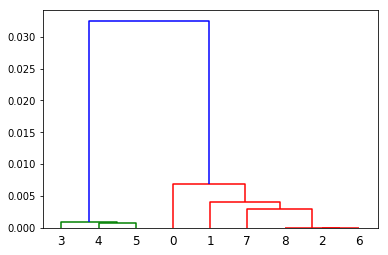

In [6]:
# Perform H-Clustering using distance matrix
# Note 3, 4, 5 days are clustered together as a day of event
Z = linkage(distArray, "single")
dn = dendrogram(Z)

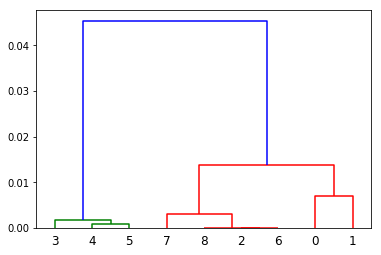

In [7]:
Z = linkage(distArray, "complete")
dn = dendrogram(Z)

In [8]:
from pyclustering.cluster.kmedoids import kmedoids;
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim;
from pyclustering.cluster.kmedoids import kmedoids;

from pyclustering.utils import read_sample;
from pyclustering.utils import timedcall;

distMatrix = np.array(distMatrix)

# K-Medoids Clustering
initial_medoids = [2, 4]

# create K-Medoids algorithm for processing distance matrix instead of points
kmedoids_instance = kmedoids(distMatrix, initial_medoids, data_type='distance_matrix', ccore=True)

# run cluster analysis and obtain results
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
print(f"Clusters: {clusters}   Medoids: {medoids}")

Clusters: [[2, 0, 1, 6, 7, 8], [4, 3, 5]]   Medoids: [2, 5]


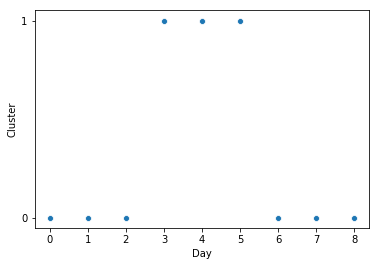

In [10]:
final_list = []
for i, l in enumerate(clusters):
    for num in l:
        final_list.append({'value': num, 'group': i})

df = pd.DataFrame(final_list)
ax = sns.scatterplot(x='value', y='group', data=df)
ax.set(xlabel='Day', ylabel='Cluster')
ax.set_yticks([0, 1])
